# Deskripsi Proyek

Operator seluler Megaline merasa tidak puas karena banyak pelanggan mereka yang masih menggunakan paket lama. Perusahaan tersebut ingin mengembangkan sebuah model yang dapat menganalisis perilaku konsumen dan merekomendasikan salah satu dari kedua paket terbaru Megaline: Smart atau Ultra.

Anda memiliki akses terhadap data perilaku para pelanggan yang sudah beralih ke paket terbaru (dari proyek kursus Analisis Data Statistik). Dalam tugas klasifikasi ini, Anda perlu mengembangkan sebuah model yang mampu memilih paket dengan tepat. Mengingat Anda telah menyelesaikan langkah pra-pemrosesan data, Anda bisa langsung menuju ke tahap pembuatan model.
Kembangkanlah sebuah model yang memiliki accuracy setinggi mungkin. Pada proyek ini, ambang batas untuk tingkat accuracy-nya adalah 0,75. Periksalah metrik accuracy model Anda dengan menggunakan test dataset.
______________________

Deskripsi Data
Setiap observasi dalam dataset yang kita miliki memuat informasi perilaku bulanan tentang satu pengguna. Adapun informasi tersebut mencakup:
1. сalls — jumlah panggilan
2. minutes — total durasi panggilan dalam satuan menit
3. messages — jumlah pesan teks
4. mb_used — traffic penggunaan internet dalam satuan MB
5. is_ultimate — paket untuk bulan yang sedang berjalan (Ultimate - 1, Surf - 0)

## Memuat data dan mempelajari informasi keseluruhan pada data

### Memuat Libary yang dibutuhkan untuk pemrosesan data

In [1]:
# import pandas and numpy untuk proses dan manipulasi data
import pandas as pd
import numpy as np 

# Import seaborn untuk statistika data visualisasi
import seaborn as sns

# import matplotlib untuk data visualisasi
import matplotlib.pyplot as plt 
from matplotlib import pyplot
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

# import train_test_split untuk membagi data
from sklearn.model_selection import train_test_split

# import modul machine learning dari library sklearn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 


# import sanity check untuk memeriksa fungsi terhadap model
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, roc_auc_score)

# Import metode prediksi sederhana atau baseline 
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# import warnings untuk menghapus peringatan saat dataset di manipulasi
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

### Memuat Data dari csv agar dapat dijalankan dengan pandas untuk menjadi DataFrame

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

###  Memuat Informasi dari dataset dan mempelajari dataset

In [3]:
print('Tabel dari dataset')
df.sample(10)

Tabel dari dataset


,calls,minutes,messages,mb_used,is_ultra
1822,115.0,679.27,1.0,28668.40,1
1451,45.0,333.49,50.0,17275.47,0
15,6.0,22.13,0.0,2710.09,0
1394,48.0,352.55,30.0,22371.84,0
3014,57.0,368.96,0.0,16890.11,0
2573,63.0,419.72,0.0,43325.34,1
969,77.0,527.44,0.0,16620.31,0
580,43.0,321.63,42.0,25599.87,1
1599,19.0,135.52,48.0,13152.50,0
1334,63.0,457.13,56.0,16211.97,1


In [4]:
print('Informasi keseluruhan dari dataset :')
df.info()

Informasi keseluruhan dari dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
print('panjang baris dari dataset :')
df.shape

panjang baris dari dataset :


(3214, 5)

In [6]:
print('memeriksa nilai yang hilang / na pada dataset :')
df.isna().sum()

memeriksa nilai yang hilang / na pada dataset :


calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [7]:
print('memeriksa duplikat pada dataset')
df.duplicated().sum()

memeriksa duplikat pada dataset


0

In [8]:
print('distribusi statisik pada dataset')
df.describe()

distribusi statisik pada dataset


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


barplot behavior pelanggan dalam penggunaan paket


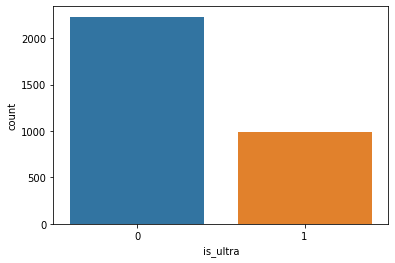

In [9]:
print('barplot behavior pelanggan dalam penggunaan paket')
sns.countplot(df["is_ultra"]);


In [10]:
print('persentase jumlah penggunaan paket')
df["is_ultra"].value_counts()/len(df)*100

persentase jumlah penggunaan paket


0    69.352831
1    30.647169
Name: is_ultra, dtype: float64

### Kesimpulan :

Setelah memproses data dan memeriksa data tidak terdapat value yang missing dan duplikasi pada data , tahap selanjutnya kita akan memisahkan dataset dengan ratio 3:1:1 pemisahan dengan persentasi traning set 60%, validation set 20% dan testing set 20%.

## Memisahkan data sumber menjadi training set, validation set, dan test set

Pada tahap ini kita membagi data menjadi training set, validation set dan test set dengan menggunakan sklearn.model_selection.train_test_split dimana kita akan memisahkan data pertama kedalam df_train dan df_test dengan persentase 20% data. dan kedua kita akan memisahkan data kedalam df_train dan df_valid dengan persentase data 80%


In [11]:
# membagi data kedalam traning dan testing  
df_train, df_test = train_test_split(df, test_size=0.20, random_state=12345)

# membagi data kedalam validation dan training
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=12345) # 0.25 * 0.80 = 0.20 for validation size

In [12]:
# melihat panjang baris data yang telah di pisah
print('panjang baris training set   {} ' .format(df_train.shape[0]) + 'persentase dataset sebesar 60% data')
print('panjang baris validation set {} ' .format(df_valid.shape[0]) + 'persentase dataset sebesar 20% data')
print('panjang baris testing set    {} ' .format(df_test.shape[0]) + 'persentase dataset sebesar 20% data')

panjang baris training set   1928 persentase dataset sebesar 60% data
panjang baris validation set 643 persentase dataset sebesar 20% data
panjang baris testing set    643 persentase dataset sebesar 20% data


In [13]:
# menentukan variabel untuk features dan target dataset training
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

# menentukan variabel untuk features dan target dataset validation
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

# menentukan variabel untuk features dan target dataset testing
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

print('Train features :', features_train.shape)
print('Train target   :',target_train.shape)
print('Valid features :',features_valid.shape)
print('Valid target   :',target_valid.shape)
print('Test features  :',features_test.shape)
print('Test target    :',target_test.shape)

Train features : (1928, 4)
Train target   : (1928,)
Valid features : (643, 4)
Valid target   : (643,)
Test features  : (643, 4)
Test target    : (643,)


### Kesimpulan :

Kita telah berhasil membagi data menjadi tiga bagian yakni training set = 60%, validation set = 20% dan testing set = 20 %.

Periksa kualitas model yang berbeda dengan mengubah hyperparameter-nya. Jelaskan secara singkat temuan-temuan yang Anda dapatkan dari penelitian ini.

## Memeriksa dan membandingkan kualitas model yang berbeda dengan mengubah hyperparameternya

### Pengembangan model 

Pada tahap ini, kita akan memproses beberapa model untuk membandingkan model mana yang paling maksimal untuk mengklasifikasi penelitian ini, dimana kita akan menggunakan model decision tree classifier, logistic regresseion dan random forest untuk mengembangkan model. langkah pertama kita akan memeriksa keakuratan model diatas sebelum kita menggunakannya.


### Hyperparameter tuning

Pada langkah kali ini kita akan melakukan penyetelan guna menemukan nilai terbaik pada model yang akan kita gunakan.

#### Decision tree classifier

Untuk model ini kita akan melakukan iterasi terhadap beberapa nilai yang berbeda dan membandingkan kualitas model dengan melakukan penyetelan dari kedalaman max_depth  dari hyperparameter.

In [14]:
# membuat fungsi dari decision tree classifier
def decision_tree_classifier(X_train, y_train, X_valid, y_valid):
    
    # membuat list untuk mendapatkan nilai
    train_scores = []
    valid_scores = []
    
    # menetapkan kedalaman pohon
    tree_depth = [i for i in range(1,21)]
    
    # membut looping untuk kedalaman pohon mas_depth dari 1 - 21
    for depth in tree_depth:
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
        model.fit(X_train, y_train) # melatih model
        
        # melakukan prediksi pada train dataset
        train_predictions = model.predict(X_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        
        # melakukan prediksi pada validation dataset
        predictions_valid = model.predict(X_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
        print('max_depth dan akurasi dari model decision tree classifer')
        print('-'*50)
        print('max_depth = {}'.format(depth))
        print('Training_set :{:.3f}'.format(accuracy_score(y_train, train_predictions)))
        print('Validation_set : {:.3f}'.format(accuracy_score(y_valid, predictions_valid)))
        print()
        
    # grafik plot dari nilai training dataset dan validation dataset pada tree_depth
    plt.figure(figsize=(10,6))
    plt.plot(tree_depth, train_scores, '-*', label='Training Datateset')
    plt.plot(tree_depth, valid_scores, '-o', label='Validation Dataset')
    plt.title('grafik plot dari nilai training dataset dan validation dataset pada tree_depth')
    plt.xlabel('Max_depth')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.show()

max_depth dan akurasi dari model decision tree classifer
--------------------------------------------------
max_depth = 1
Training_set :0.758
Validation_set : 0.739

max_depth dan akurasi dari model decision tree classifer
--------------------------------------------------
max_depth = 2
Training_set :0.792
Validation_set : 0.757

max_depth dan akurasi dari model decision tree classifer
--------------------------------------------------
max_depth = 3
Training_set :0.812
Validation_set : 0.765

max_depth dan akurasi dari model decision tree classifer
--------------------------------------------------
max_depth = 4
Training_set :0.821
Validation_set : 0.764

max_depth dan akurasi dari model decision tree classifer
--------------------------------------------------
max_depth = 5
Training_set :0.827
Validation_set : 0.759

max_depth dan akurasi dari model decision tree classifer
--------------------------------------------------
max_depth = 6
Training_set :0.834
Validation_set : 0.757

max_

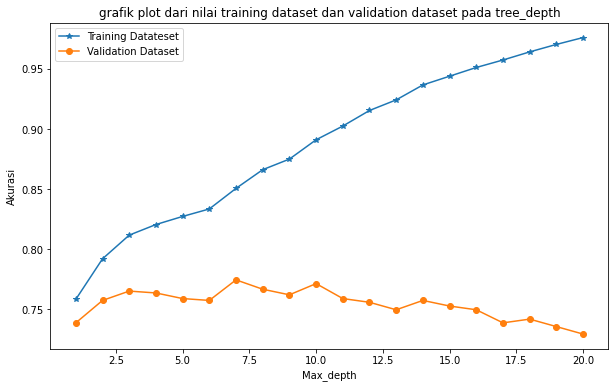

In [15]:
# menjalankan fungsi akurasi dari decision tree classifier
decision_tree_classifier(features_train, target_train, features_valid, target_valid)

Kesimpulan :

Model decision tree classifier dapat menentukan rencana yang tepat ketika kita menjalankan alogaritam pembelajaran untuk melatih model membuat prediksi, disini kita membuat loop untuk menentukan hyperparameter dari kedalam pohon max_depth dari 1 hingga 20 untuk melihat kedalaman mana yang paling cocok untuk digunakan. pada percobaan model decision tree/ diatas kita memplot nilai akurasi pada dataset training dan dataset validation untuk memvisualisasikan. dapat diamati bagaimana akurasi dari tes validasi terus meningkat hingga mencapai max_depth = 4 dimana tingakat akurasinya mencapai 82.1% untuk training set dan 76.4% untuk validation set.

#### Logistic Regression 

In [16]:
# Membuat Fungsi untuk model logistic regression model 
def logistic_regression(X_train, y_train, X_valid, y_valid):
    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(X_train, y_train) # melatih model
    model.score(X_train, y_train) # melihat akurasi model dengan score
    train_predictions = model.predict(X_train) # prediksi score dari training dataset
    predictions_valid = model.predict(X_valid) # prediksi score dari validation dataset
    print('Score Akurasi dari model logistic regression')
    print('-'*50)
    print('Training Dataset Score   : {:.3f}'.format(accuracy_score(y_train, train_predictions)))
    print('Validation Dataset Score : {:.3f}'.format(accuracy_score(y_valid, predictions_valid)))
    print('-'*50)
    print('Confusion Matrix')
    print(confusion_matrix(y_valid, predictions_valid))

In [17]:
# Menjalankan fungsi akurasi score dari model logistic regression model 
logistic_regression(features_train, target_train, features_valid, target_valid)

Score Akurasi dari model logistic regression
--------------------------------------------------
Training Dataset Score   : 0.742
Validation Dataset Score : 0.729
--------------------------------------------------
Confusion Matrix
[[439   4]
 [170  30]]


Kesimpulan :

Meskipun pelatihan modelnya cepat, akurasinya lebih rendah. Model regresi logistik memberikan akurasi 74.2% untuk training dataset, dan sekitar 72.9% untuk dataset validation. Ini lebih rendah dari target akurasi pada model decision tree classifier dimana score untuk validation datasetnya sebesar 76.4% . Kita dapat melihat di sini bahwa baik score training dataset maupun score validation datasetnya tidak tinggi. Ini karena modelnya tidak cukup kompleks sehingga terjadi underfitting. Kami tidak dapat menggunakan model ini karena score training dan validationnya rendah.

#### Random Forest Classifier

Untuk model ini kita akan melakukan iterasi terhadap beberapa nilai yang berbeda dan membandingkan kualitas model dengan melakukan penyetelan dari kedalaman max_depth dari hyperparameter.

In [18]:
# membuat fungsi dari decision tree classifier
def random_forest_classifier(X_train, y_train, X_valid, y_valid):
    
    # membuat list untuk mendapatkan nilai
    train_scores = []
    valid_scores = []
    
    # menetapkan jarak n_estimator
    estimator_depth = [i for i in range(1,21)]
    
    # membut looping untuk kedalaman pohon mas_depth dari 1 - 21
    for estimator in estimator_depth:
        model = RandomForestClassifier(random_state=12345, n_estimators=estimator)
        model.fit(X_train, y_train) # melatih model
        
        # melakukan prediksi pada train dataset
        train_predictions = model.predict(X_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        
        # melakukan prediksi pada validation dataset
        predictions_valid = model.predict(X_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
        print('n_estimator dan akurasi dari model random forest classifier')
        print('-'*50)
        print('max_depth = {}'.format(estimator))
        print('Training_set :{:.3f}'.format(accuracy_score(y_train, train_predictions)))
        print('Validation_set : {:.3f}'.format(accuracy_score(y_valid, predictions_valid)))
        print()
        
    # grafik plot dari nilai training dataset dan validation dataset pada n_estimator
    plt.figure(figsize=(10,6))
    plt.plot(estimator_depth, train_scores, '-*', label='Training Datateset')
    plt.plot(estimator_depth, valid_scores, '-o', label='Validation Dataset')
    plt.title('grafik plot dari nilai training dataset dan validation dataset pada n_estimator')
    plt.xlabel('Max_depth')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.show()

n_estimator dan akurasi dari model random forest classifier
--------------------------------------------------
max_depth = 1
Training_set :0.902
Validation_set : 0.703

n_estimator dan akurasi dari model random forest classifier
--------------------------------------------------
max_depth = 2
Training_set :0.910
Validation_set : 0.757

n_estimator dan akurasi dari model random forest classifier
--------------------------------------------------
max_depth = 3
Training_set :0.959
Validation_set : 0.745

n_estimator dan akurasi dari model random forest classifier
--------------------------------------------------
max_depth = 4
Training_set :0.948
Validation_set : 0.765

n_estimator dan akurasi dari model random forest classifier
--------------------------------------------------
max_depth = 5
Training_set :0.971
Validation_set : 0.762

n_estimator dan akurasi dari model random forest classifier
--------------------------------------------------
max_depth = 6
Training_set :0.965
Validation

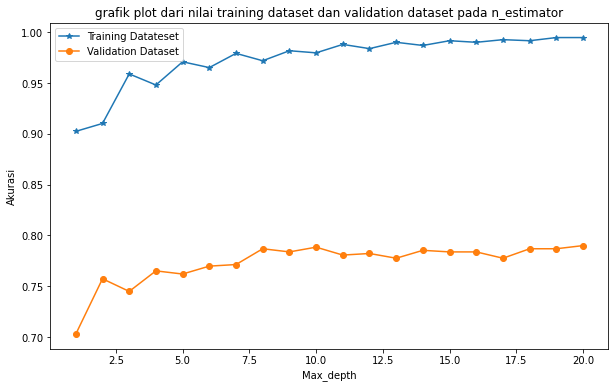

In [19]:
# Menjalankan fungsi dari model random forest classifier
random_forest_classifier(features_train, target_train, features_valid, target_valid)

Kesimpulan :

Pada model random forest classifier ini kita menyetel hyperparameter dengan random_state dan mengatur jumlah decision tree menggunakan hyperparameter n_estimators. disini kita akan menggunakan score n_estimator 10 dimana pada pengklasisfikasi nya memberikan nilai akurasi 98.% untuk training dataset dana 78.8% untuk validation dataset.

#### Kesimpulan  :

Dari temuan hasil score  pada beberapa model yakni decision tree classifier dengan  max_depth 4 dimana tingkat akurasinya mencapai 82.1% untuk training dataset dan 76.4% untuk validation dataset, lalu pada model random forest classifier kita lihat bahwa score n_estimator dengan max_depth 10 dengan tingkat akurasi sebesar 98% pada training dataset dan 78.8% untuk validation dataset.lalu pada model logistic regression dengan akurasi 74.2% untuk training dataset, dan sekitar 72.9% untuk dataset validation. untuk tahap selanjutnya yakni test prediksi kita akan menggunakan random forest classifier untuk melihat prediksi pada dataset yang tidak terlihat.


### Memeriksa Kualitas Model

#### Model Testing

Pada tahap sebelumnya kita telah menentukan bahwa model yang paling akurat menurut persentasi akurasinya adalah random forest classifier. Pada tahap ini kita akan menggunakan model ini untuk membuat prediksi menggunakan test dataset.

In [20]:
# membuat fungsi untuk menguji model dari decision tree classifier
def test_random_forest_classifier(X_train, y_train, X_valid, y_valid, X_test, y_test):
    
    # membuat list untuk mendapatkan nilai
    train_scores = []
    valid_scores = []
    test_scores  = []
    
    # menetapkan jarak n_estimator dengan akurasi tertinggi 
    estimator_depth = [10]
    
    # membut looping untuk menguji model 
    for estimator in estimator_depth:
        model = RandomForestClassifier(random_state=12345, n_estimators=estimator)
        model.fit(X_train, y_train) # melatih model
        
        # melakukan prediksi pada train dataset
        train_predictions = model.predict(X_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        
        # melakukan prediksi pada validation dataset
        predictions_valid = model.predict(X_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
        
        # melakukan prediksi pada test dataset 
        test_predictions = model.predict(X_test)
        test_predictions_acc = accuracy_score(y_test, test_predictions)
        test_scores.append(test_predictions_acc)
       
        print('Pengujian n_estimator dan akurasi dari model random forest classifier pada Train, Valid & Test set')
        print('-'*50)
        print('max_depth = {}'.format(estimator))
        print('Accuracy score Training_set   : {:.3f}'.format(accuracy_score(y_train, train_predictions)))
        print('Accuracy score Validation_set : {:.3f}'.format(accuracy_score(y_valid, predictions_valid)))
        print('Accuracy score Test_set       : {:.3f}'.format(accuracy_score(y_test, test_predictions)))
        

In [21]:
test_random_forest_classifier(features_train, target_train, features_valid, target_valid, features_test, target_test)

Pengujian n_estimator dan akurasi dari model random forest classifier pada Train, Valid & Test set
--------------------------------------------------
max_depth = 10
Accuracy score Training_set   : 0.980
Accuracy score Validation_set : 0.788
Accuracy score Test_set       : 0.787


#### Kesimpulan :

Dengan menggunkana model random forest classifier kita menguji model dengan Test dataset dan mendapatkan score akurasi sebesar 79%.

### Sanity Check terhadap model 

Pada tahap ini kita ingin mendapatkan gambaran mengenail keakuratan model pada validation dataset. kita dapat menyesuaikan model pada training dataset dan membuat prediksi untuk validation dataset, lalu mengevaluasi keefektifan algorithmnya. Cara yang lebih baik untuk menilai keefektifan algorime pembelajaran mesin adalah dengan menghitung skor dari precision, recall, f1 score dan confusion metrix serta classification report. 

#### Baseline

Pada tahap ini kita akan membandingkan akurasi model dengan baseline dimana baseline ini adalah sebuah metode prediksi yang sederhana tanpa machine learning. lalu kita akan membandingkan metode baseline ini dengan model machine learning yang telah kita latih.

#### Dummy Classifier and Gaussian Naive Bayes

In [29]:
# membuat baseline prediksi menggunakan dummy classifier
dummy_model = DummyClassifier(strategy='stratified')
dummy_model.fit(features_train, target_train)
dummy_model.score(features_train, target_train)
dummy_predictions = dummy_model.predict(features_test)

print('Accuracy Score pada Test dataset menggunakan dummy classifier : {:.2%}'.format(dummy_model.score(features_test, dummy_predictions)))

Accuracy Score pada Test dataset menggunakan dummy classifier : 56.92%


In [28]:
# membuat baseline prediksi dengan menggunakan gaussian naive bayes
gnb = Pipeline([('scale', StandardScaler()), ('nb', GaussianNB())]).fit(features_train, target_train)
gnb_predictions = gnb.predict(features_test)
print('probabiliti dari setiap kelas : {} '.format(gnb.named_steps['nb'].class_prior_))
print('accuracy pada test dataset    : {:.2%} '.format(gnb.named_steps['nb'].score(features_test, target_test)))

probabiliti dari setiap kelas : [0.69450207 0.30549793] 
accuracy pada test dataset    : 30.48% 


Kesimpulan :

Setelah kita menggunakan metode baseline dengan metode prediksi sederhana didapati bahwa dengan menggunakan metode sederhana ini yakni dummy classifier dan gaussian naive bayes didapati score accuracy pada dummy sebesar 59.% dan gnb sebesar 30%. mari kita bandingkan dengan model machine learning yang telah kita latih modelnya.

#### Confusion Matrix, Precision, Recall, F1-score, Accuracy score

In [24]:
# Fungsi untuk menghitung precision, recal dan F1 Score
def show_sanity_check(X_train, y_train, X_valid, y_valid):
    model = RandomForestClassifier(random_state=12345)
    model.fit(X_train, y_train)
    predictions_valid = model.predict(X_valid)
    print('Confusion Matrix')
    print('-'*50)
    print(confusion_matrix(y_valid, predictions_valid))
    print()
    print('Recall         :', recall_score(y_valid, predictions_valid))
    print('Precision      :', '{:.3f}'.format(precision_score(y_valid, predictions_valid)))
    print('F1             :','{:.3f}'.format(f1_score(y_valid, predictions_valid)))
    print('Accuracy Score :', '{:.2%}'.format(accuracy_score(y_valid, predictions_valid)))
    print()
    print('Classification Report :')
    print('-'*50)
    print(classification_report(y_valid, predictions_valid))

In [25]:
# Menjalankan Fungsi
show_sanity_check(features_train, target_train, features_valid, target_valid)

Confusion Matrix
--------------------------------------------------
[[401  42]
 [ 90 110]]

Recall         : 0.55
Precision      : 0.724
F1             : 0.625
Accuracy Score : 79.47%

Classification Report :
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       443
           1       0.72      0.55      0.63       200

    accuracy                           0.79       643
   macro avg       0.77      0.73      0.74       643
weighted avg       0.79      0.79      0.79       643



Kesimpulan :

Confusion matrix membantu kita untuk mendapat gamabaran tentang seberapa baik prediksi kita secara aktual dan seberapa tepat prediksi. recall memberikan kita ukuran seberapa akurat model dalam mengidentifikasi pola dalam data yakni sebesar 0.55% atau 55%. Lalu precision dari model kita adalah 0.724 jadi ketika model memprediksi paket telepon dari perilaku pelanggan secara persentase 72% benar. lalu penghitungan F1 sebesar 0.625, dan accuracy model kita sebesar 79%. 

Jadi pada tahap ini kita dapat membandingkan bahwa penggunaaan model machine learning yang lebih rumit memang lebih baik dari pada baseline prediksi yang sangat sederhana dengan accuracy dari Model ML Random Forest classifier dengan tingkat accuracy sebesar 79.47%  dan accuracy score dengan baseline sederhana menggunakan dummy classifier sebesar 56% lalu gaussian naive bayes sebesar 30.48%.

### Kesimpulan Akhir 

Pada tahap awal kita melihat struktur dan informasi keseluruhan data, pada data diamati tidak terdapat duplikasi dan nilai yang hilang. dari bentuk data memiliki 5 kolom dan 3214 baris. lalau dengan membagi dataset menjadi training, validation dan test dengan rasio 3:1:1 atau 60% training dataset, 20% validation dataset, 20% test dataset. setelah data dipisah training dataset memiliki 1928 baris, 643 baris pada validation dataset, 643 pada test dataset. Pada tahap selanjutnya untuk mengetahui kualitas model yang berbeda denga mengubah hyperparameternya. disini kita melakukan pengklasifikasin decision tree, logistic regression, dan random forest classification dan didapati random forest classification menjadi model terbaik untuk digunakan .

Dari hasil investigasi kualitas model yang berbeda, kita dapat melihat bahwa score dari n_estimator 10 dari random forest memberikan accuracy akurasi 98.% untuk training dataset dana 78.8% untuk validation dataset. lalauu pada tahap memeriksa kualitas model untuk menguji prediksi pada test dataset yang tidak terlihat dan didapati score akurasi sebesar 79%. lalu sebagai langkah tambahan untuk memeriksa Sanity Check pada model kita menghitung confusion metrix, recall, precision, F1 dan score accuracy serta classification report.

Di akhir project kita mencapai tujuan untuk mengembangkan tingkat accuracy setinggi mungkin dengan ambang batas accuracy sebesar 75% dari tugas bisnis, dimana model kita memperoleh accuracy sebesar 79% dengan ini maka model ini mencapai apayang dibutuhkan untuk mengembangkan bisnis dana memilih rencana yang tepat. dengan kata lain jika kita menggunkan model ini untuk memprediksi paket telepon yang tepat untuk pelanggan maka tingkat prediksi nya sebesar 79% akan benar. 